In [ ]:

import numpy as np 
from numpy import newaxis
import pandas as pd 
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM, GRU, SimpleRNN
from keras.models import Sequential
from keras import optimizers
from keras.utils import normalize
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib.dates 

Cargamos los datos de santander


In [ ]:
def dejarPredictores(data, predictores, valor):
  print("sacando predictores")
  return data[predictores + [valor]]
def dibujarGraficaTemporal(data , valor):
  data[valor].plot()
def dividirTestTrain(data, porcentaje = 0.9):
    row = round(porcentaje * data.shape[0])
    train = data[:row]
    test = data[row:]
    return train,test
def cargarDatos(ruta, valor, fecha, len_x, len_y, predictores, division = 0.9):
  data = pd.read_csv(ruta,index_col=fecha, parse_dates=[fecha])
  print(data.head())
  print("dataset cargado")
  print(type(data[valor]))
  data2 = dejarPredictores(data, predictores, valor)
  print(data2.head())
  dibujarGraficaTemporal(data,valor)
  print(data2.shape[0])
  y = data2[valor]
  print(y.head())
  x = data2
  print(x.head())
  data3x = []
  data3y = []
  for i in range(data2.shape[0] - (len_x + len_y)):
    data3x.append(x[i : i + len_x])
    data3x[i] = (data3x[i] - data3x[i].mean()) / (data3x[i].max() - data3x[i].min())
    data3y.append(y[i :  i + len_x + len_y])
    data3y[i] = (data3y[i] - data3y[i].mean()) / (data3y[i].max() - data3y[i].min())
    data3y[i] = data3y[i][len_x : len_x + len_y]
  data3x = np.array(data3x)
  data3y = np.array(data3y)
  print("x shape",data3x.shape)
  print("y shape",data3y.shape)
  row = round(division * data3x.shape[0])
  x_train = data3x[:row,]
  y_train = data3y[:row,]
  x_test = data3x[row:,]
  y_test = data3y[row:,]
  print("x train shape",x_train.shape)
  print("y train shape",y_train.shape)
  print("x test shape",x_test.shape)
  print("y test shape",y_test.shape)
  return data, x_train , y_train , x_test, y_test

Se han truncado las últimas 5000 líneas del flujo de salida.
2019-11-12   -0.113717
Name: Close, dtype: float64
Date
2019-06-24    0.319139
2019-06-25    0.319139
2019-06-26    0.377391
2019-06-27    0.387100
2019-06-28    0.416226
                ...   
2019-11-07    0.027877
2019-11-08   -0.030376
2019-11-11   -0.030376
2019-11-12   -0.108046
2019-11-13   -0.243968
Name: Close, Length: 101, dtype: float64
Date
2019-11-13   -0.243968
Name: Close, dtype: float64
Date
2019-06-25    0.324714
2019-06-26    0.382966
2019-06-27    0.392675
2019-06-28    0.421801
2019-07-01    0.421801
                ...   
2019-11-08   -0.024801
2019-11-11   -0.024801
2019-11-12   -0.102470
2019-11-13   -0.238393
2019-11-14   -0.238393
Name: Close, Length: 101, dtype: float64
Date
2019-11-14   -0.238393
Name: Close, dtype: float64
Date
2019-06-26    0.388350
2019-06-27    0.398058
2019-06-28    0.427184
2019-07-01    0.427184
2019-07-02    0.427184
                ...   
2019-11-11   -0.019417
2019-11-12  

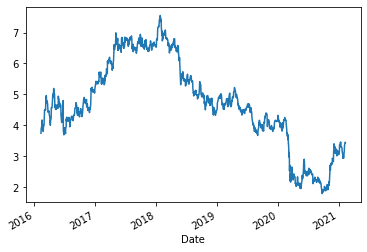

In [ ]:
ruta = '/content/drive/MyDrive/proyectos data/SAN.csv'
data = 0
open = 1
high = 2
low = 4
close = 5
adjClose = 6
colume = 7
len_x = 100
len_y = 1
#emoezamos con close
data, x_train , y_train , x_test, y_test = cargarDatos(ruta, 'Close', 'Date', len_x, len_y, ['Open','High','Low','Adj Close','Volume'])
#x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],x_train.shape[2], 1))
#x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],x_test.shape[2], 1))

Creamos el modelo

In [ ]:
model = Sequential() #https://keras.io/guides/sequential_model/
model.add(SimpleRNN(50, return_sequences=True, input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(Dropout(0.2)) #https://keras.io/api/layers/regularization_layers/dropout/
model.add(SimpleRNN(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(len_y, activation = "linear")) #https://keras.io/api/layers/core_layers/dense/

model.compile(loss='mse', optimizer='adam')
print (model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 100, 50)           2850      
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 100)               15100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                1010      
Total params: 18,960
Trainable params: 18,960
Non-trainable params: 0
_________________________________________________________________
None


Entrenamos


In [ ]:
model.fit(x_train, y_train, batch_size=20, epochs=20, validation_data = (x_test, y_test))

Epoch 1/20
52/52 [==============================] - 4s 55ms/step - loss: 0.2952 - val_loss: 0.1275
Epoch 2/20
52/52 [==============================] - 2s 45ms/step - loss: 0.1596 - val_loss: 0.1199
Epoch 3/20
52/52 [==============================] - 2s 45ms/step - loss: 0.1305 - val_loss: 0.1107
Epoch 4/20
52/52 [==============================] - 2s 45ms/step - loss: 0.1166 - val_loss: 0.1115
Epoch 5/20
52/52 [==============================] - 3s 64ms/step - loss: 0.1107 - val_loss: 0.1074
Epoch 6/20
52/52 [==============================] - 3s 55ms/step - loss: 0.1070 - val_loss: 0.1094
Epoch 7/20
52/52 [==============================] - 2s 47ms/step - loss: 0.1046 - val_loss: 0.1168
Epoch 8/20
52/52 [==============================] - 2s 48ms/step - loss: 0.1035 - val_loss: 0.1077
Epoch 9/20
52/52 [==============================] - 2s 48ms/step - loss: 0.1022 - val_loss: 0.1083
Epoch 10/20
52/52 [==============================] - 2s 46ms/step - loss: 0.1027 - val_loss: 0.1143
Epoch 11/

Entrenamos